In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [4]:
startup=pd.read_csv('D:\\ExcelR Assignments\\Multi Linear Regression\\50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


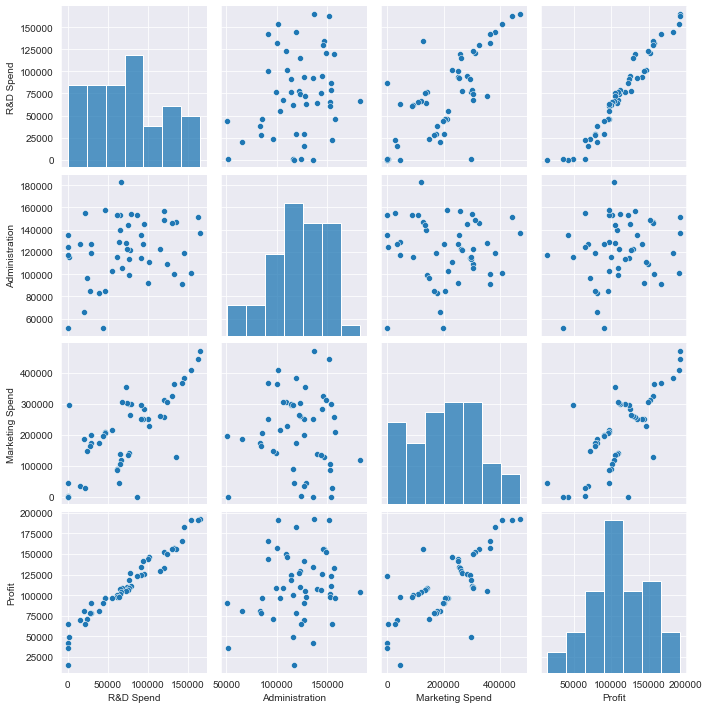

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [16]:
startup=startup.rename({'R&D':'RD'},axis=1)
startup=startup.rename({'Administration':'Admin'},axis=1)
startup=startup.rename({'Marketing Spend':'MS'},axis=1)
startup.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
model=smf.ols('Profit~RD+Admin+MS',data=startup).fit()

In [18]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [19]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [20]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RD           17.846374
Admin        -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [21]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [22]:
rsq_rd=smf.ols('RD~Admin+MS',data=startup).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_Admin=smf.ols('Admin~RD+MS',data=startup).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_ms=smf.ols('MS~RD+Admin',data=startup).fit().rsquared
vif_ms=1/(1-rsq_ms)

d1={'Variables':['RD','Admin','MS'],'VIF':[vif_rd,vif_Admin,vif_ms]}
Vif_frame=pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,RD,2.468903
1,Admin,1.175091
2,MS,2.326773


In [23]:
startup['Predicted']=model.fittedvalues
startup['Error']=model.resid
startup

,RD,Admin,MS,State,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


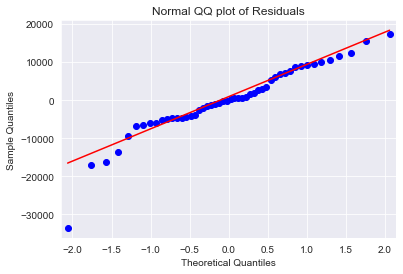

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal QQ plot of Residuals")
plt.show()

C:\Users\shefs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

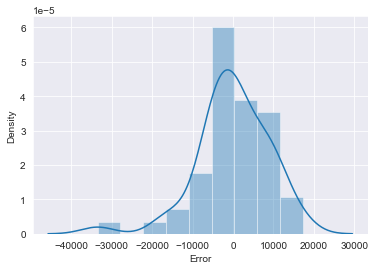

In [28]:
sns.distplot(startup['Error'])

In [29]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

0     2.048512
1     1.962904
2     1.784550
3     1.569528
4     1.529906
5     1.312132
6     1.173034
7     1.221564
8     1.010891
9     1.090863
10    0.597857
11    0.599503
12    0.435750
13    0.393765
14    0.955090
15    0.870779
16    0.124749
17    0.462578
18    0.432599
19    0.092175
20    0.117733
21    0.135030
22    0.068557
23   -0.051297
24    0.034359
25   -0.248719
26   -0.035929
27    0.060951
28   -0.263418
29   -0.259984
30   -0.319591
31   -0.364489
32   -0.331068
33   -0.358709
34   -0.584549
35   -0.547086
36   -0.934491
37   -0.569784
38   -1.076695
39   -0.719666
40   -0.946456
41   -0.946797
42   -1.053210
43   -1.319192
44   -1.206108
45   -1.637667
46   -1.420992
47   -1.667184
48   -1.598972
49   -1.623304
dtype: float64
0    -0.029001
1     0.294602
2     0.995289
3     1.029070
4    -0.665334
5    -0.736666
6    -0.222642
7    -0.477210
8     0.052550
9    -0.572899
10    1.186432
11    0.970983
12    1.391517
13    0.762344
14   -1.894413
15   -1.82

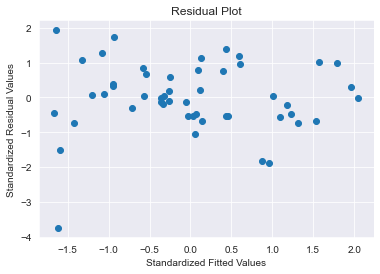

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()


In [32]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

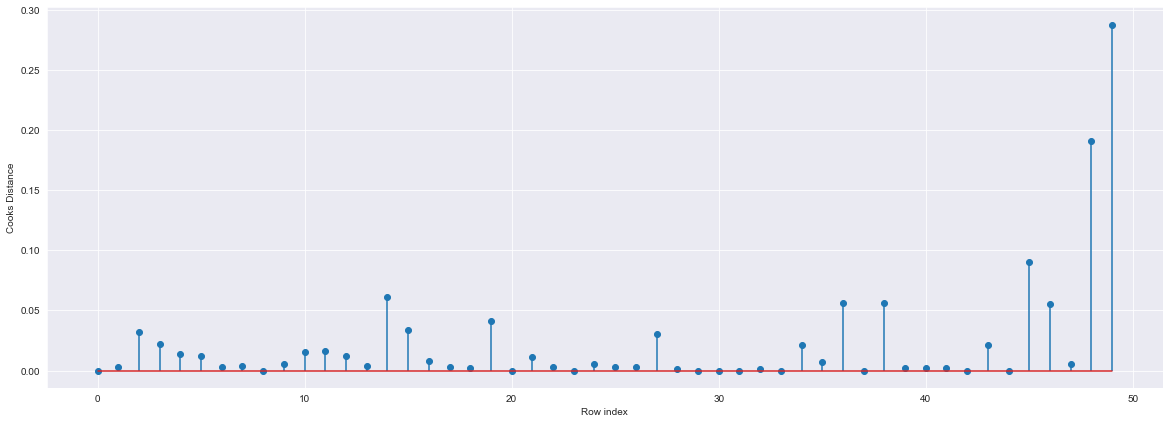

In [33]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

In [ ]:
Since the value is <1 ,we can finalize the model.